<a href="https://colab.research.google.com/github/audrey-siqueira/Data-Science-Projects/blob/master/Thompson_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optimizing ADS clicks using Thompson Sampling**
---
<p align="justify">
A sales company designed 10 different ADS for the same product, with the goal of knowing which AD most induces people to click on the banner. If uses traditional statistical mathematics, the company can test all ADS the same number of times and check which AD returned the most clicks.

<p align=center>
<img src="https://drive.google.com/uc?id=1Qq6spUq_M3m0NQL-z1F7sY5F0xUIyp6d" width="40%"></p>

<p align="justify">
But a data engineer at the company presented a project using reinforcement learning, indicating that it was not necessary to test all ADS the same number of times to find out which AD was the best. He said it was possible to find out which AD would be the best with the test in process, using fewer attempts and optimizing the total number of clicks.

<p align=center>
<img src="https://drive.google.com/uc?id=1mf7bi-6hZILElcEcmXa8tFL_PdVjyj3r" width="60%"></p>

He stated that with each round of testing, an AD would be more likely to be tested in the next round, if in the previous round the AD had a positive result, if it had a negative result the chances of being drawn for the next round would decrease in percentage, that way, the AD that had the best chances would always be presented to the user.

The strategy in this case is to use the **Thompson Sampling** Reinforcement Learning method to optimize the number of clicks. 


**Code description is explained below:**

## **Importing the libraries**


The 3 libraries needed for the project are imported.
- Pandas for data manipulation and analysis
- Numpy for mathematical operations
- Matplotlib for graphical visualizations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Importing the data set**


The .csv file containing  database is imported.

The values of the database header and how they are distributed can be viewed in the image below:

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Reinforcement Learning/Thompson Sampling/Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## **Applying Thompson Sampling model on the dataset**

The **random** library was used to apply the **Thompson Sampling** method.



In [ ]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

## **Visualising the results**

Displaying the histogram of ads selections.

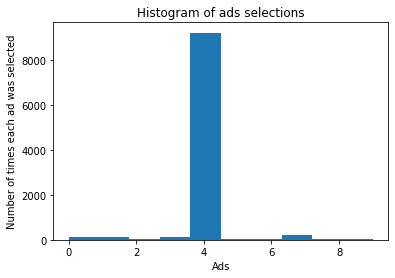

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

## **Conclusion**

The Thompson Sampling returned around 9000 clicks using AD number 5 . 